**PARTE 2**
==
**Ejercicio Obligatorio - Curso Machine Learning UTN**
==
**Alumno: Mariano Raul Vila**

**Profe: MSc. Ing. Enrique Nicanor Mariotti**

Algunas conclusiones de lo trabajado:
==
* En árboles de decisión se obtuvo mejor score con 2 que con 3 en profundidad. Con los datos normalizados no hubo cambio en score o en matriz de confusión. 
* Luego se procedió a utilizar PCA reduciendo a 2, con ello se mejoró el score de .83  a .94. 

LIBRERIAS
==

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# Datasets
# ==============================================================================
from sklearn import datasets
from sklearn.datasets import load_wine

# Preprocesado y modelado
# ==============================================================================
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn import model_selection
from sklearn.model_selection import train_test_split #separo datos entrenamiento
from sklearn.tree import DecisionTreeClassifier #arboles
from sklearn.preprocessing import scale #escalamiento 
from sklearn.preprocessing import minmax_scale #escalamiento
from sklearn.preprocessing import StandardScaler #escalamiento
import mglearn
from sklearn.decomposition import PCA #análisis de componentes principale

# Evaluar el modelo
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score #area bajo la curva
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

DATASET
==

In [2]:
#DATASET
dataset = load_wine()

#Exploramos el dataset
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
#leemos la info descriptiva del dataset
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#Crearemos un dataframe
inputs=dataset.data
output=dataset.target
df=pd.DataFrame(inputs, columns=dataset.feature_names)

In [5]:
#vemos info de cada campo del df. No se observan valores nulos en ninguno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


FEATURES - GRÁFICOS
==

In [7]:
#Para X se selecciona dos campos. Para 'y' el target
X = np.array(df[[ 'proline','color_intensity']])
y = np.array(dataset.target)

In [8]:
#contamos cuantas etiquetas diferentes tenemos
unique, counts = np.unique(y, return_counts=True)
resultado = np.column_stack((unique, counts)) 
print (resultado)

[[ 0 59]
 [ 1 71]
 [ 2 48]]


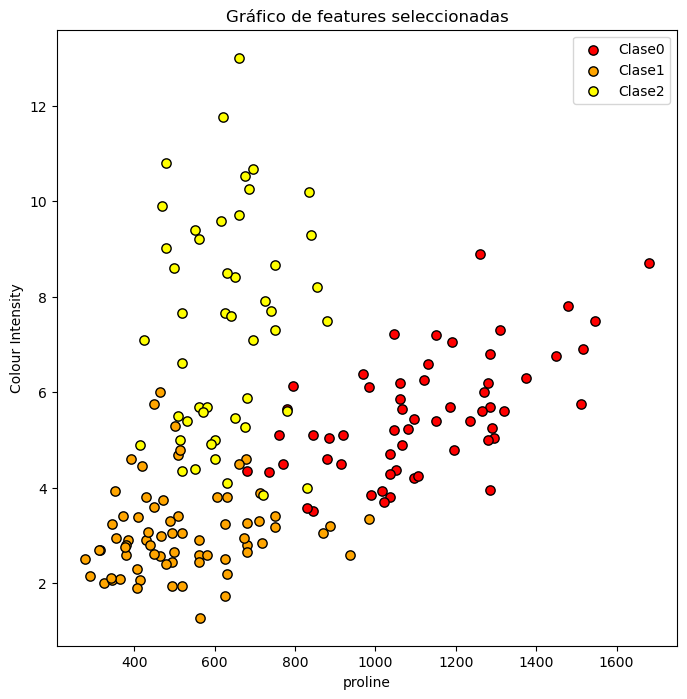

In [9]:
# Se grafican las variables seleccionadas
# defino para leyenda la etiqueta de diabetes
#Syntax :numpy.where(condition[, x, y]) si se cumple cond me trae x, sino y

labels=y

cdict = {0: 'red', 1: 'orange', 2: 'yellow'}
catdict= {0:'Clase0', 1: 'Clase1', 2:'Clase2'}

figure, ax = plt.subplots(figsize=(8,8))

labels = y
for g in np.unique(labels):
    ix = np.where(g == labels)
    ax.scatter(X[ix,0], X[ix,1], c = cdict[g], label = catdict[g], s = 45,edgecolor='k')

plt.xlabel('proline')
plt.ylabel('Colour Intensity')
plt.title('Gráfico de features seleccionadas')

#plt.colorbar()
#plt.grid() #cargo una grilla
plt.legend()
plt.show()

NORMALIZO / ESCALO PARA LUEGO COMPARAR
==

In [10]:
#StandarScaler
scaler = StandardScaler()
X_1=scaler.fit_transform(X)


Arboles de decisión
==

In [13]:
#definir los conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

arbol = DecisionTreeClassifier(max_depth =2 )
arbol.fit(x_train, y_train)
y_pred = arbol.predict(x_test)


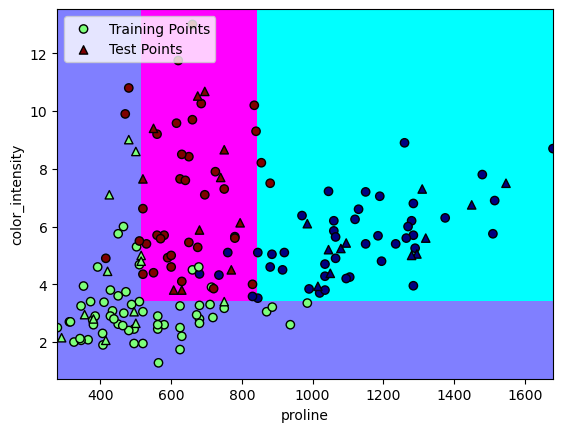

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("proline")
plt.ylabel("color_intensity")

plt.show()

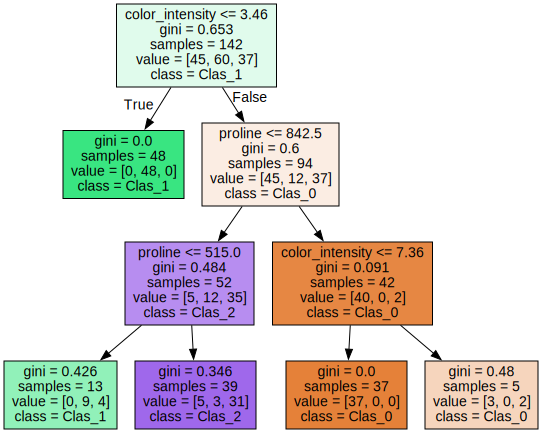

In [15]:
features_names = ['proline', 'color_intensity']
y_names = ['Clas_0', 'Clas_1','Clas_2']

#l impurity True me muestra el gini para ver impureza
export_graphviz(arbol, out_file='arbol1.dot', class_names=y_names, feature_names=features_names, impurity=True, filled=True)
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [16]:
accuracy=arbol.score(x_test,y_test)
print(accuracy)

0.7777777777777778


In [17]:
print(classification_report(y_test, y_pred))
#classification_report le indico y_test e y_pred

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.69      0.82      0.75        11
           2       0.64      0.64      0.64        11

    accuracy                           0.78        36
   macro avg       0.78      0.77      0.77        36
weighted avg       0.79      0.78      0.78        36



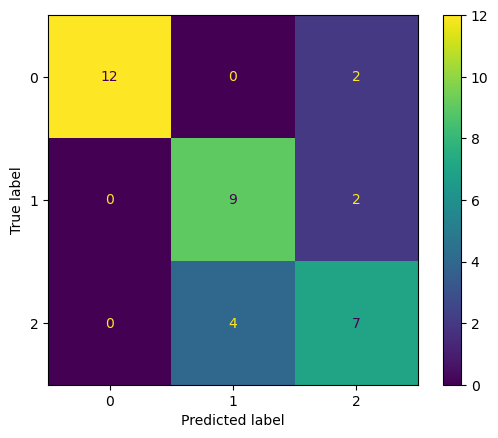

In [18]:
#matriz de confusión sobre datos iniciales
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Arboles de decisión - DATOS NORMALIZADOS StandardScaler
==

In [19]:
#definir los conjuntos de entrenamiento y test
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(X_1, y, test_size=0.2, random_state=12, shuffle=True)

In [21]:
arbol = DecisionTreeClassifier(max_depth = 2)

arbol.fit(x_train_n, y_train_n)

y_pred_n = arbol.predict(x_test_n)

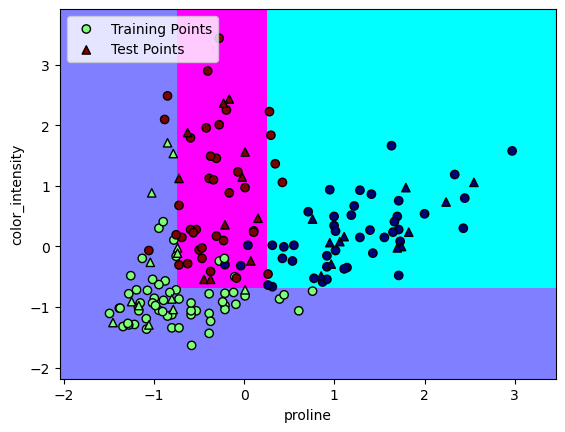

In [22]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_1[:, 0].min() - 0.5,  X_1[:, 0].max() + 0.5
y_min, y_max =  X_1[:, 1].min() - 0.5,  X_1[:, 1].max() + 0.5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train_n[:, 0], x_train_n[:, 1], c=y_train_n, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test_n[:, 0], x_test_n[:, 1], c=y_pred_n, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("proline")
plt.ylabel("color_intensity")

plt.show()

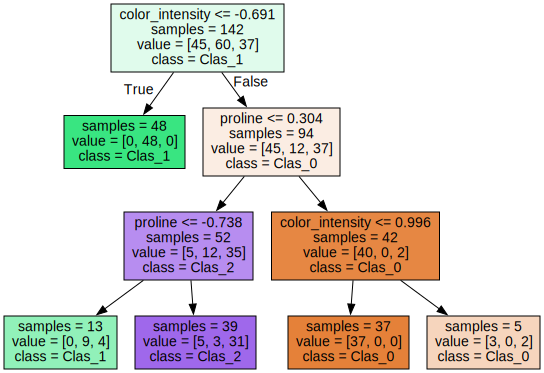

In [23]:
features_names = ['proline', 'color_intensity']
y_names = ['Clas_0', 'Clas_1','Clas_2']

export_graphviz(arbol, out_file='arbol2.dot', class_names=y_names, feature_names=features_names, impurity=False, filled=True)
with open('arbol2.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [24]:
accuracy_1=arbol.score(x_test_n,y_test_n)
print(accuracy_1)

0.7777777777777778


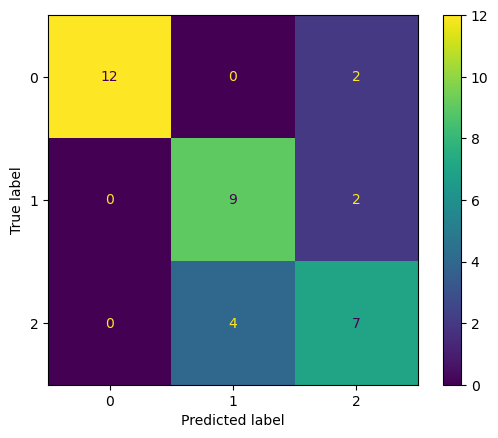

In [25]:
#matriz de confusión
cm_1 = confusion_matrix(y_test_n, y_pred_n)
cm_display_1 = ConfusionMatrixDisplay(cm_1).plot()

**PCA PARA MEJORAR DECISION TREE**
==

In [26]:
#normalizamos dataset

scaler = StandardScaler()
X_2=scaler.fit_transform(inputs)
X_2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

(178, 13)
(178, 2)


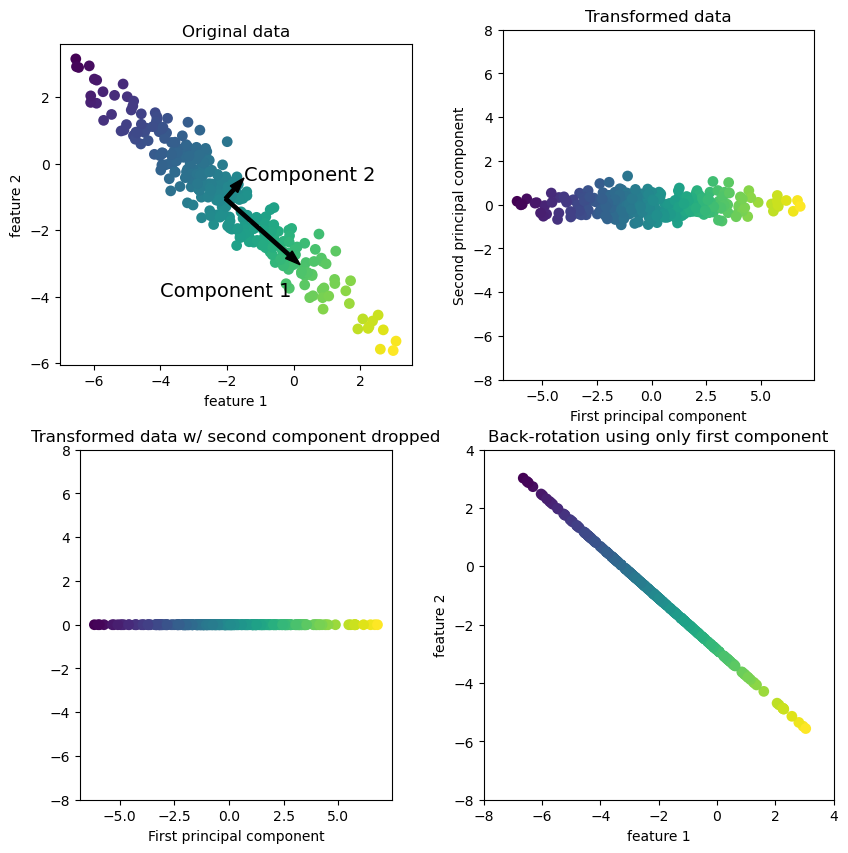

In [27]:
# APLICAREMOS PCA

mglearn.plots.plot_pca_illustration()

#creamos el modelo
pca=PCA(n_components=2)

#Para ajustar con nuestra matriz de datos por features hacemos
pca.fit(X_2)

transformada=pca.transform(X_2)

print(X_2.shape)
print(transformada.shape)

In [29]:
#definir los conjuntos de entrenamiento y test
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(transformada, y, test_size=0.2, random_state=12, shuffle=True)

arbol = DecisionTreeClassifier(max_depth =2 )
arbol.fit(x_train_3, y_train_3)
y_pred_3 = arbol.predict(x_test_3)


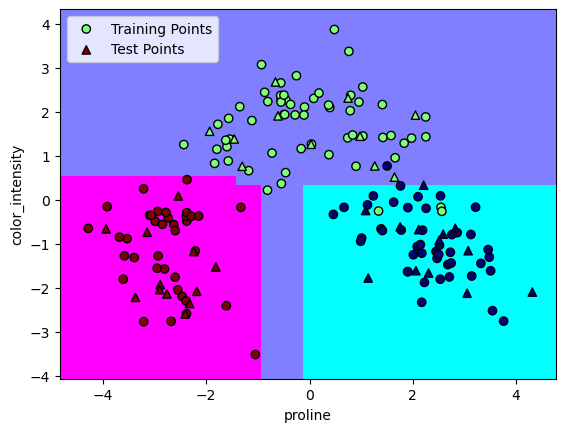

In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = transformada[:, 0].min() - 0.5,  transformada[:, 0].max() + 0.5
y_min, y_max =  transformada[:, 1].min() - 0.5,  transformada[:, 1].max() + 0.5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train_3[:, 0], x_train_3[:, 1], c=y_train_3, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test_3[:, 0], x_test_3[:, 1], c=y_pred_3, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("proline")
plt.ylabel("color_intensity")

plt.show()

In [31]:
accuracy_3=arbol.score(x_test_3,y_test_3)
print(accuracy_3)

0.9444444444444444


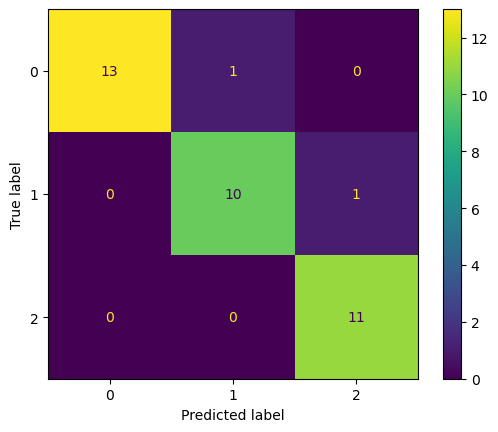

In [32]:
#matriz de confusión
cm_2 = confusion_matrix(y_test_3, y_pred_3)
cm_display_2 = ConfusionMatrixDisplay(cm_2).plot()